# Amy Jung

Coding assignment:
 
Attached is a file with simulated maternity claims.  We ask candidates interviewing for a role our team to look into the data and share with us his/her findings.  You can complete this assignment in whichever programming language you prefer (e.g. SAS, R, Python, SQL, etc).  In addition to providing us with your code, we’d like you to report:
- The average claim cost and length of stay for the entire patient population
- The average claim cost and length of stay for each ICD 10 diagnostic code
- Any other observations / summary statistics you’d like to share
- Any assumptions you made (if any)
- Approximately how long you worked on the project
 
Feel free to send your assignment over before the interview if you complete it early. During the interview we will be going over the code and your results.

In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('maternity_claims_2017.csv')
df

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
0,101511,1992-02-24,24,F,37027,2017-01-23,O80,5,15590.55
1,101143,1992-08-22,25,F,37013,2017-09-16,O82,7,37930.46
2,193330,1983-02-22,34,F,37250,2017-10-07,O82,7,24965.33
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
4,142808,1970-09-11,47,F,37250,2017-12-13,O82,8,21954.30
...,...,...,...,...,...,...,...,...,...
64148,102809,1989-07-22,27,NaN,37122,2017-02-02,O80,4,11357.88
64149,136397,1981-09-28,35,F,37013,2017-08-22,O82,8,22995.74
64150,190534,1976-06-25,40,F,37250,2017-04-21,O69,6,18503.37
64151,137050,1969-05-11,47,F,37250,2017-03-06,O80,7,11688.88


In [4]:
#there are 70 null rows
df.isnull().any()

patient_id               False
date_of_birth            False
patient_age              False
gender                    True
zip_code                 False
date_of_delivery         False
icd_10_diagnosis_code    False
length_of_stay           False
total_claim_cost         False
dtype: bool

In [5]:
#there are 8030 null rows
nulls = df[df['gender'].isnull()]
nulls

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
8,123308,1972-10-09,44,NaN,37122,2017-03-14,O80,5,13126.84
18,107025,1991-08-19,26,NaN,37122,2017-12-08,O80,4,10548.96
20,131810,1991-10-07,25,NaN,37122,2017-09-09,O82,5,14755.51
31,181267,1990-12-09,26,NaN,37122,2017-02-07,O69,11,37980.42
35,170166,1990-06-19,27,NaN,37122,2017-08-30,O80,5,10137.91
...,...,...,...,...,...,...,...,...,...
64137,144047,1991-09-28,26,NaN,37122,2017-10-04,O80,7,20453.20
64139,142808,1979-02-23,38,NaN,37122,2017-08-24,O80,4,3621.72
64141,189132,1971-01-15,46,NaN,37122,2017-03-20,O69,7,18450.53
64146,150037,1998-07-11,19,NaN,37122,2017-09-08,O67,8,21336.14


## Any assumptions you made (if any)
- Assumng nulls in 'gender' column to be Female, because csv is of maternity claims. Therefore, not dropping null columns in analysis.
- negative claims are normal ?

In [9]:
type(df['date_of_delivery'][0])

str

In [10]:
df['date_of_delivery'].unique()

array(['2017-01-23', '2017-09-16', '2017-10-07', '2017-01-12',
       '2017-12-13', '2017-03-20', '2017-10-19', '2017-03-11',
       '2017-03-14', '2017-04-07', '2017-12-05', '2017-04-02',
       '2017-07-12', '2017-09-01', '2017-03-29', '2017-01-03',
       '2017-01-07', '2017-09-28', '2017-12-08', '2017-11-18',
       '2017-09-09', '2017-02-07', '2017-05-07', '2017-07-24',
       '2017-06-29', '2017-01-16', '2017-04-12', '2017-08-23',
       '2017-10-11', '2017-03-10', '2017-09-14', '2017-07-07',
       '2017-08-30', '2017-01-06', '2017-12-06', '2017-05-14',
       '2017-05-02', '2017-02-19', '2017-07-31', '2017-12-12',
       '2017-08-03', '2017-03-01', '2017-08-21', '2017-08-06',
       '2017-11-25', '2017-12-17', '2017-06-07', '2017-06-20',
       '2017-10-20', '2017-10-12', '2017-06-10', '2017-04-24',
       '2017-06-11', '2017-08-20', '2017-03-02', '2017-03-24',
       '2017-06-26', '2017-02-06', '2017-08-29', '2017-11-20',
       '2017-06-12', '2017-11-02', '2017-01-25', '2017-

## The average claim cost and length of stay for the entire patient population

### claim cost

In [16]:
# avg claim cost
np.mean(df['total_claim_cost'])

18901.730289776144

<AxesSubplot:>

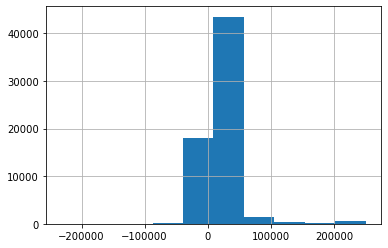

In [26]:
df['total_claim_cost'].hist()

In [28]:
df['total_claim_cost'].sort_values()

25282   -232105.71
31515   -201340.82
14173   -175619.58
42566   -169745.38
8541    -167863.65
           ...    
40604    250000.00
54041    250000.00
46465    250000.00
59026    250000.00
20165    250000.00
Name: total_claim_cost, Length: 64153, dtype: float64

In [35]:
# 1888 negative claims
len(df[df['total_claim_cost'] < 0]) 

1888

**Are negative claims a thing??**

In [32]:
# avg positive claim cost
np.mean(df[df['total_claim_cost'] >= 0]['total_claim_cost'])

19839.145641692805

In [33]:
# avg negative claim cost
np.mean(df[df['total_claim_cost'] < 0]['total_claim_cost'])

-12013.612341101672

### length of stay

In [17]:
# avg length of stay 
np.mean(df['length_of_stay'])

5.488083176157

<AxesSubplot:>

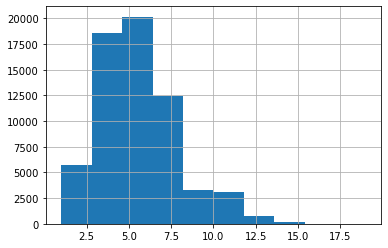

In [36]:
df['length_of_stay'].hist()

## The average claim cost and length of stay for each ICD 10 diagnostic code

In [45]:
# the different unique ICD 10 codes
unique_icd_codes = df['icd_10_diagnosis_code'].unique()
unique_icd_codes

array(['O80', 'O82', 'O03', 'O69', 'O67'], dtype=object)

In [42]:
# sanity check for ICD 10: O80
df[df['icd_10_diagnosis_code']=='O80']

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
0,101511,1992-02-24,24,F,37027,2017-01-23,O80,5,15590.55
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
5,189210,1989-08-31,27,F,37250,2017-03-20,O80,5,11415.21
6,129631,1981-04-24,36,F,37250,2017-10-19,O80,5,14280.38
8,123308,1972-10-09,44,NaN,37122,2017-03-14,O80,5,13126.84
...,...,...,...,...,...,...,...,...,...
64144,185761,1988-01-22,29,F,37167,2017-12-27,O80,6,8008.90
64145,169604,1980-11-12,36,F,37013,2017-04-26,O80,8,23949.26
64147,116312,1996-01-19,21,F,37027,2017-03-17,O80,4,11958.67
64148,102809,1989-07-22,27,NaN,37122,2017-02-02,O80,4,11357.88


In [51]:
for code in unique_icd_codes: 
    print(f'For ICD', code)
    
    cost = np.mean(df[df['icd_10_diagnosis_code']==code]['total_claim_cost'])
    print(f'average total_claim_cost: ', cost)

    stay = np.mean(df[df['icd_10_diagnosis_code']==code]['length_of_stay'])
    print(f'average length_of_stay: ', stay)
    print(" ")

For ICD O80
average total_claim_cost:  9828.93564386212
average length_of_stay:  4.563601652806109
 
For ICD O82
average total_claim_cost:  31630.64586792277
average length_of_stay:  6.607965674843765
 
For ICD O03
average total_claim_cost:  21368.91127170465
average length_of_stay:  5.57128882367327
 
For ICD O69
average total_claim_cost:  35056.783305654484
average length_of_stay:  7.539739027283511
 
For ICD O67
average total_claim_cost:  38524.3955068629
average length_of_stay:  7.576153464527865
 


## Any other observations / summary statistics you’d like to share

### Patient age
There may be something wrong with the patient age. 

<AxesSubplot:>

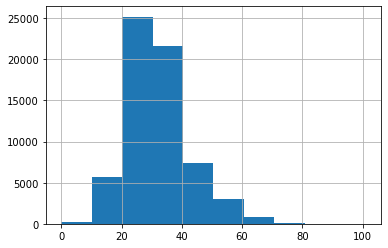

In [52]:
df['patient_age'].hist()

In [53]:
df['patient_age'].sort_values()

11667      0
45971      1
49442      1
40301      3
35098      3
        ... 
50486     85
13135     91
35065     94
42207     95
57173    101
Name: patient_age, Length: 64153, dtype: int64

Repeating patients

In [11]:
# Are there repeating patients? Are the patient IDs all unique
len(df['patient_id'].unique()) # 64153 rows in df 

57364

<AxesSubplot:>

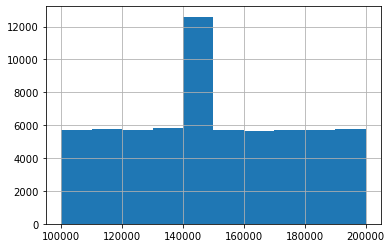

In [54]:
df['patient_id'].hist()

In [55]:
df['patient_id']

0        101511
1        101143
2        193330
3        142808
4        142808
          ...  
64148    102809
64149    136397
64150    190534
64151    137050
64152    157354
Name: patient_id, Length: 64153, dtype: int64

In [58]:
id_dict = {}
for ID in df['patient_id']:
    if ID not in id_dict.keys():
        id_dict[ID] = 1
    else:
        id_dict[ID] += 1

In [64]:
sorted(id_dict.items(), key=lambda x: x[1], reverse=True)

[(142808, 6790),
 (101511, 1),
 (101143, 1),
 (193330, 1),
 (189210, 1),
 (129631, 1),
 (141924, 1),
 (123308, 1),
 (195451, 1),
 (116116, 1),
 (154722, 1),
 (135397, 1),
 (103536, 1),
 (189081, 1),
 (176875, 1),
 (170691, 1),
 (107025, 1),
 (197058, 1),
 (131810, 1),
 (104777, 1),
 (125528, 1),
 (103273, 1),
 (192594, 1),
 (116138, 1),
 (119824, 1),
 (161592, 1),
 (183218, 1),
 (117006, 1),
 (181267, 1),
 (108324, 1),
 (156847, 1),
 (126016, 1),
 (170166, 1),
 (149963, 1),
 (117516, 1),
 (183465, 1),
 (101499, 1),
 (182828, 1),
 (169679, 1),
 (154642, 1),
 (114510, 1),
 (157789, 1),
 (148698, 1),
 (193485, 1),
 (158367, 1),
 (149652, 1),
 (193041, 1),
 (125128, 1),
 (112902, 1),
 (187569, 1),
 (136528, 1),
 (148756, 1),
 (119809, 1),
 (123813, 1),
 (157085, 1),
 (127909, 1),
 (114757, 1),
 (170022, 1),
 (143770, 1),
 (125515, 1),
 (176371, 1),
 (190728, 1),
 (189448, 1),
 (132582, 1),
 (106136, 1),
 (185684, 1),
 (110290, 1),
 (172153, 1),
 (153813, 1),
 (164564, 1),
 (173374, 1),
 (1

In [70]:
df[df['patient_id'] == 142808]

,patient_id,date_of_birth,patient_age,gender,zip_code,date_of_delivery,icd_10_diagnosis_code,length_of_stay,total_claim_cost
3,142808,1978-02-25,38,F,37027,2017-01-12,O80,4,8669.38
4,142808,1970-09-11,47,F,37250,2017-12-13,O82,8,21954.30
16,142808,1991-04-12,25,F,37013,2017-01-07,O80,12,34030.83
29,142808,1987-11-08,29,F,37250,2017-08-23,O80,6,15846.48
36,142808,1975-08-28,41,NaN,37122,2017-01-06,O03,5,12039.82
...,...,...,...,...,...,...,...,...,...
64098,142808,1979-05-30,37,F,37013,2017-02-04,O80,6,20798.25
64102,142808,2000-05-08,17,F,37027,2017-07-26,O80,3,7266.08
64103,142808,2001-05-20,16,F,37013,2017-11-22,O80,5,11627.90
64113,142808,1983-12-31,33,F,37250,2017-08-31,O67,11,35808.68
